![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

In [4]:
import pandas as pd

brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# Start coding here...

In [5]:
#check the dataframe usig head()
#print(brands.head(1))
#print(finance.head(1))
#print(info.head(1))
#print(reviews.head(1))

#merge files using product_id
df = brands.merge(finance,on = 'product_id')
df = df.merge(info, on ='product_id')
df = df. merge(reviews, on ='product_id')

#check the merged table
df.columns

#check for NaN 
df.isnull().values.any()
print(f'Dataframe with NaN: {df.isnull().values.any()}')

#count NaN for the dataframe
df.isnull().sum()
print(df.isnull().values.any())

#drop columns with NaN
df.dropna(inplace = True)

#check the dataframe for any NaN values
print(f'Dataframe with NaN: {df.isnull().values.any()}')

Dataframe with NaN: True
True
Dataframe with NaN: False


In [40]:
# What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?
#duplicate file for a copy
df1 = df.copy()

# create labels quartile one as"Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite".
label = ['Budget','Average','Expensive','Elite']
df1['price_label'] = pd.qcut(df1['listing_price'], q=4, labels=label)
print(df1.head())

#create a dataframe adidas_vs_nike containing the following columns: "brand", "price_label", "num_products", and "mean_revenue"
adidas_vs_nike = df1.groupby(['brand','price_label'],as_index = False).agg(num_products =('price_label','count'),mean_revenue=('revenue','mean')).round(2)

print(adidas_vs_nike.head(10))

  product_id   brand  listing_price  ...  rating  reviews  price_label
1     G27341  Adidas          75.99  ...     3.3     24.0    Expensive
2     CM0081  Adidas           9.99  ...     2.6     37.0       Budget
3     B44832  Adidas          69.99  ...     4.1     35.0    Expensive
4     D98205  Adidas          79.99  ...     3.5     72.0    Expensive
5     B75586  Adidas          47.99  ...     1.0     45.0      Average

[5 rows x 11 columns]
    brand price_label  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


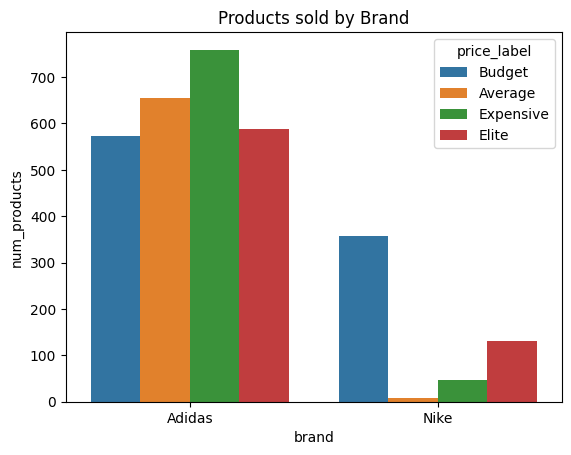

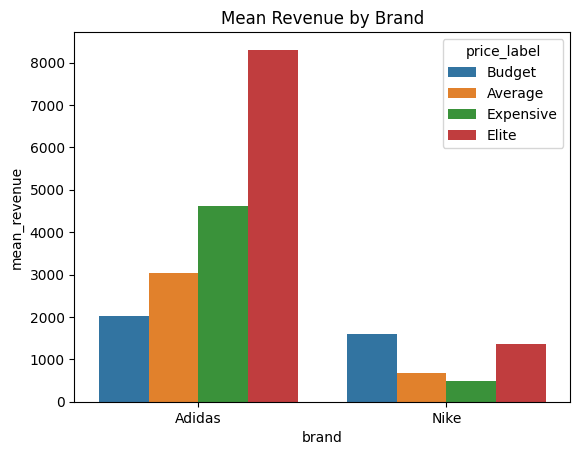

In [48]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot bar graph for mean_revenue
sns.barplot(x = "brand", y = "num_products", hue = "price_label", data = adidas_vs_nike)

# fine-tune the graph
plt.title('Products sold by Brand')

plt.show()

# plot bar graph for mean_revenue
sns.barplot(x = "brand", y = "mean_revenue", hue = "price_label", data = adidas_vs_nike)

# fine-tune the graph
plt.title('Mean Revenue by Brand')
plt.show()

In [11]:
# Do any differences exist between the word count of a product's description and its mean rating?

# Find the min and max words description length
df2 = df.copy()
df2['word_counts'] = df2['description'].str.len()
print(df2.head())
print(f'min words count: {df2["word_counts"].min()}\n max words count: {df2["word_counts"].max()}')

# Create bins and split the word_counts into bins of 100, cal the rating and number of reviews
words_length = [0,100,200,300,400,500,600,700]
label = ['0-99','100-199','200-299','300-399','400-499','500-599','600-699']
df2['description_length'] = pd.cut(df2['word_counts'], bins=words_length, labels=label)

#Store the results as a pandas DataFrame called description_lengths containing the following columns: "description_length", "mean_rating", "num_reviews", again rounding numeric values to two decimal places.

description_lengths = df2.groupby(['description_length'],as_index = False).agg(mean_rating=('rating','mean'),num_reviews=('reviews','count')).round(2)

print(description_lengths.head(7))


  product_id   brand  listing_price  ...  rating  reviews  word_counts
1     G27341  Adidas          75.99  ...     3.3     24.0          175
2     CM0081  Adidas           9.99  ...     2.6     37.0          172
3     B44832  Adidas          69.99  ...     4.1     35.0          264
4     D98205  Adidas          79.99  ...     3.5     72.0          288
5     B75586  Adidas          47.99  ...     1.0     45.0          221

[5 rows x 11 columns]
min words count: 14
 max words count: 687
  description_length  mean_rating  num_reviews
0               0-99         2.26            7
1            100-199         3.19          526
2            200-299         3.28         1785
3            300-399         3.29          651
4            400-499         3.35          118
5            500-599         3.12           15
6            600-699         3.65           15


The colinear factor between description length and mean rating is 0.028826791510492642


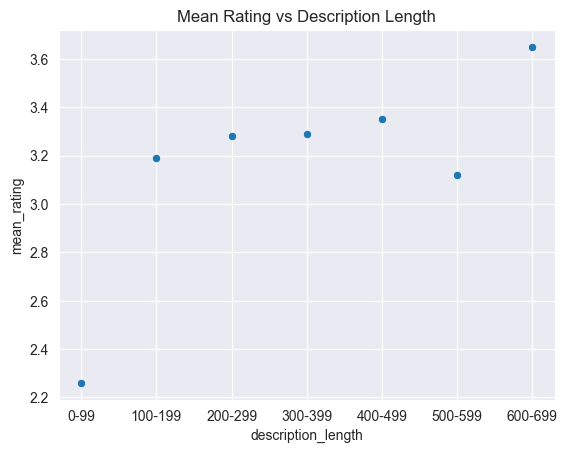

In [24]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The colinear factor of the 2 variables 
correlation_coefficient = df2['word_counts'].corr(df2['rating'])
print(f'The colinear factor between description length and mean rating is {correlation_coefficient}' )

# plot the scatterplot
sns.scatterplot(data=description_lengths, x='description_length', y='mean_rating')

# Fine-tune graph
plt.title('Mean Rating vs Description Length')
sns.set_style("darkgrid")
plt.show()

In [90]:
# How does the volume of products and median revenue vary between clothing and footwear?

import pandas as pd

df4 = df.copy()

# Filter for shoes
foot_wear = df4[df4['description'].str.contains('shoe|trainer|foot', case=False)]

# Filter for clothing
clothing = df4[~df4['product_id'].isin(foot_wear['product_id'])].dropna(subset=['product_id'])

# Create a pandas DataFrame called product_types
product_types = pd.DataFrame({
    'num_clothing_products': [len(clothing)],
    'median_clothing_revenue': [clothing['revenue'].median()],
    'num_footwear_products': [len(foot_wear)],
    'median_footwear_revenue': [foot_wear['revenue'].median()]
})
display(product_types)

,num_clothing_products,median_clothing_revenue,num_footwear_products,median_footwear_revenue
0,417,503.82,2700,3121.02
